<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/general_pca_kmeans_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
def features_generator(pca_components=2,data_frame_bool = False,np_bool = True):
  """ 
  function take number of pca components and return dataframe or numpy array contains
  pca components, normalized systolic/diastolic, normalized systolic, and normalized diastolic 
   """ 
  df = pd.DataFrame()

  all_pca = pd.read_csv("/content/gdrive/MyDrive/data/pca100_200000.csv")
  all_pca = all_pca.drop("Unnamed: 0",axis = 1)
  sys_dia = pd.read_csv("/content/gdrive/MyDrive/data/sys_dia_pca1_pca2.csv")
  df["norm_sys"] = sys_dia['systolic'] / sys_dia['systolic'].max() 
  df["norm_dia"] = sys_dia['diastolic'] / sys_dia['diastolic'].max() 
  df["sys_by_dia"] = df["norm_sys"] / df['norm_dia']
  if data_frame_bool:
    for i in range(pca_components):
      col_name = "pca"+str(i)
      df[col_name] = all_pca[str(i)]
    
    return df
  else:
    for i in range(pca_components):
      col_name = "pca"+str(i)
      df[col_name] = all_pca[str(i)]
    
    return df.values



In [12]:
def Silhouette_analysis(data,start , stop , step):
  range_n_clusters = list(range(start,stop,step))
  silhouette_avg = []
  prev_score = 0.
  for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_   
    # silhouette score
    sil_score = silhouette_score(data, cluster_labels)
    if sil_score >= prev_score:
      silhouette_avg.append(sil_score)
      prev_score = sil_score
    else:
      break
    print("K = ",num_clusters," finished")
    l = len(silhouette_avg)
  plt.plot(range_n_clusters[0:l],silhouette_avg,"bx-")
  plt.xlabel('Values of K') 
  plt.ylabel("‘Silhouette score’") 
  plt.title("‘Silhouette analysis For Optimal k’")
  plt.show()
  max_index = silhouette_avg.index(max(silhouette_avg))
  
  return  range_n_clusters[max_index]

In [6]:
#k-means plotter 
def kmeans_plotter(k , data,starCluster,stopCluster ):
  kmeans = KMeans(n_clusters=k,max_iter = 10000)
  kmeans.fit(data)
  cluster_labels = kmeans.labels_
  pca = PCA(n_components=2)
  pca_values = pca.fit_transform(data)
  dic = {}
  x = np.arange(k)
  ys = [i+x+(i*x)**2 for i in range(k)]

  colors = cm.rainbow(np.linspace(0, 1, len(ys)))
  for i in range(starCluster,stopCluster):
    print("number of datasets of cluster ",i," = ",cluster_labels[cluster_labels == i].shape[0])
    print("color of cluster",i," is ",colors[i])
    dic[i] = pca_values[cluster_labels == i]
    plt.scatter(dic[i][:1000,0],dic[i][:1000,1],color = colors[i])
  return cluster_labels

In [47]:
features = features_generator(2,data_frame_bool=True,np_bool=False)


K =  4  finished
K =  6  finished


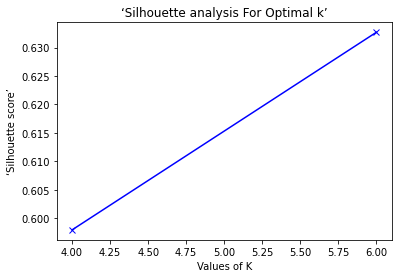

In [48]:
best_k = Silhouette_analysis(features,4,20,2)

In [49]:
best_k

6

number of datasets of cluster  0  =  141490
color of cluster 0  is  [0.5 0.  1.  1. ]
number of datasets of cluster  1  =  13357
color of cluster 1  is  [0.1        0.58778525 0.95105652 1.        ]
number of datasets of cluster  2  =  12859
color of cluster 2  is  [0.3        0.95105652 0.80901699 1.        ]
number of datasets of cluster  3  =  12844
color of cluster 3  is  [0.7        0.95105652 0.58778525 1.        ]
number of datasets of cluster  4  =  12714
color of cluster 4  is  [1.         0.58778525 0.30901699 1.        ]
number of datasets of cluster  5  =  12587
color of cluster 5  is  [1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


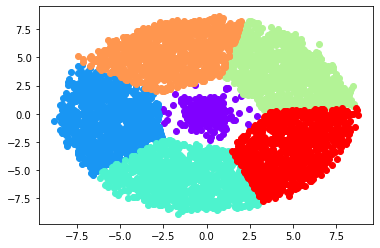

In [52]:
labels = kmeans_plotter(best_k, features,0,best_k )

In [53]:
import sklearn

sklearn.metrics.davies_bouldin_score(features, labels)

0.7141372204390762

In [54]:
sklearn.metrics.calinski_harabasz_score(features, labels)


142496.94698565232